<a href="https://colab.research.google.com/github/adrita23/Machine-Learning_Assignment_2/blob/main/ML_Fall21_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Fall 2021
#ML 633: Machine Learning
#Homework: 2 
#Date: October 7, 2021
#Author: Adrita Anika

In [2]:
#Question 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import data
data = pd.read_csv('/content/drive/MyDrive/ML HW/hw2_data.csv') 

In [5]:
data.head()

,name,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,primary_strength,combat_point
0,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,1079
1,Ivysaur,120,156,158,0.08,0.07,4.2,Grass,1643
2,Venusaur,160,198,200,0.04,0.05,1.7,Grass,2598
3,Charmander,78,128,108,0.16,0.10,25.3,Fire,962
4,Charmeleon,116,160,140,0.08,0.07,1.2,Fire,1568


**Question 2: Machine Learning with Pokemon Go**

**i. Data exploration:** Column 8 is categorical and Column 2-Column 7 are numerical attributes of this dataset.

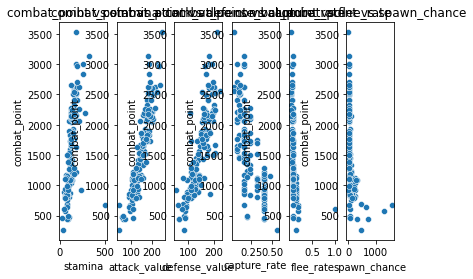

In [6]:
# ii. Plot 2D Scatter Plots
# for columns 2-6
fig, axes = plt.subplots(1, 6)
sns.set(rc = {'figure.figsize':(25,5)})

for i in range(1,7):
  sns.scatterplot(ax= axes[i-1], x=data.columns[i], y=data.columns[-1], data=data)
  axes[i-1].set_title(data.columns[-1]+ " vs "+ data.columns[i])

Text(0.5, 1.0, 'combat_point vs primary_strength')

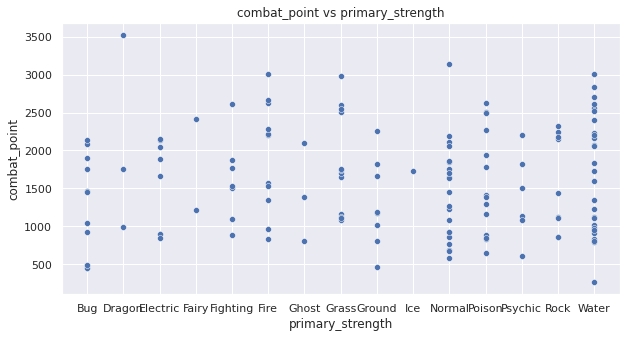

In [7]:
#for column 7
data[data.columns[-2]] = data[data.columns[-2]].astype('category')
#data.describe(include='category')
sns.set(rc = {'figure.figsize':(10,5)})
ax2 = sns.scatterplot( x=data.columns[-2], y=data.columns[-1], data=data)
ax2.set_title(data.columns[-1]+ " vs "+ data.columns[-2])

In [8]:
#calculate pearson coefficient
#pearson_r = []
from scipy import stats
for i in range(1, 7):
  #print(len(data.columns[i]), len(data.columns[-1]))
  pearson_r, p = stats.pearsonr(data[data.columns[i]], data[data.columns[-1]])
  print(f"The Pearson coefficient between {data.columns[-1]} and {data.columns[i]} are: {round(pearson_r,4)}")

The Pearson coefficient between combat_point and stamina are: 0.5828
The Pearson coefficient between combat_point and attack_value are: 0.9075
The Pearson coefficient between combat_point and defense_value are: 0.8262
The Pearson coefficient between combat_point and capture_rate are: -0.743
The Pearson coefficient between combat_point and flee_rate are: -0.407
The Pearson coefficient between combat_point and spawn_chance are: -0.4213


**ii. Data Exploration:**
The corelation is maximum between the combat point and attack value (0.9075) and the second maximum corelation is between the combat point and defense value (0.8262).  So, attack value and defense value are the most predictive features of the outcome of comabat points.

In [9]:
numerical_attributes = data.columns[1:-2]
#print(numerical_attributes)
from itertools import combinations
 
comb = list(combinations(numerical_attributes, 2))
print(comb, len(comb))

[('stamina', 'attack_value'), ('stamina', 'defense_value'), ('stamina', 'capture_rate'), ('stamina', 'flee_rate'), ('stamina', 'spawn_chance'), ('attack_value', 'defense_value'), ('attack_value', 'capture_rate'), ('attack_value', 'flee_rate'), ('attack_value', 'spawn_chance'), ('defense_value', 'capture_rate'), ('defense_value', 'flee_rate'), ('defense_value', 'spawn_chance'), ('capture_rate', 'flee_rate'), ('capture_rate', 'spawn_chance'), ('flee_rate', 'spawn_chance')] 15


The Pearson coefficient between stamina and attack_value are: 0.303
The Pearson coefficient between stamina and defense_value are: 0.3027
The Pearson coefficient between stamina and capture_rate are: -0.4469
The Pearson coefficient between stamina and flee_rate are: -0.271
The Pearson coefficient between stamina and spawn_chance are: -0.2764
The Pearson coefficient between attack_value and defense_value are: 0.7368
The Pearson coefficient between attack_value and capture_rate are: -0.6906
The Pearson coefficient between attack_value and flee_rate are: -0.3691
The Pearson coefficient between attack_value and spawn_chance are: -0.4326
The Pearson coefficient between defense_value and capture_rate are: -0.6973
The Pearson coefficient between defense_value and flee_rate are: -0.4239
The Pearson coefficient between defense_value and spawn_chance are: -0.4325
The Pearson coefficient between capture_rate and flee_rate are: 0.4405
The Pearson coefficient between capture_rate and spawn_chance a

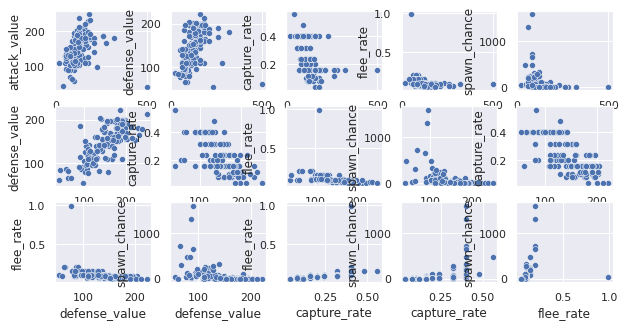

In [10]:
# iii. Plot scatters plots between the features and see thier correlation
fig, axes = plt.subplots(3, 5)
sns.set(rc = {'figure.figsize':(25,10)})
j = 0
for i in range(len(comb)):
  feature1 = comb[i][0]
  feature2 = comb[i][1]
  sns.scatterplot(ax=axes[j][i%5], x=data[feature1], y = data[feature2], data = data)
  #axes[j][i%5].set_title(feature1 + " vs " + feature2)
  if (i+1)%5 ==0:
    j+=1
  pearson_r, p = stats.pearsonr(data[feature1], data[feature2])
  print(f"The Pearson coefficient between {feature1} and {feature2} are: {round(pearson_r,4)}")

#calculate correlation matrix and plot heatmap
dataC = data[1:-2]
cormat = dataC.corr()
#print(round(cormat,4))


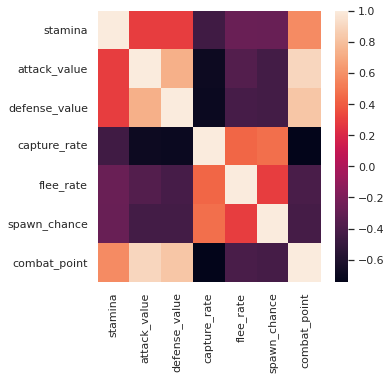

In [11]:
#calculate correlation matrix and plot heatmap
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cormat)

**iii. Data Exploration**
From the observation of pearson coefficient between different features and from the heatmap, it is evident that attack value amd defense value are mostly correlated to each other. 

In [12]:
# Pre-processing of categorical values with one hot encoding

#print(data["primary_strength"].unique())
#print(data["primary_strength"].value_counts())
one_hot_encoded_data = pd.get_dummies(data, columns = ['primary_strength'])
#print(one_hot_encoded_data)

**iv Pre-processing of categorical values with one hot encoding**

In [13]:
#v. Implementing Linear Regression with Closed Form Solution
class Linear_regression:

  def __init__(self, X_train, Y_train):
    self.Y_train = Y_train
    # X_train is a N x D dimensional matrix, where N is the number of samples and D is the numebr of features 
    N, D = X_train.shape
    a = np.ones([N, 1])
    self.X_train = np.hstack((a, X_train))
    #self.w = np.random.rand(D+1, 1)

  def fit(self):
    #Ordinary least square solution
    A =  np.linalg.pinv(np.matmul((self.X_train).T, self.X_train)) 
    B = np.matmul((self.X_train).T, self.Y_train)
    self.w = np.matmul(A,B)
    #print("The number of parameters", len(self.w))

  def predict(self, X_test):
    n, D = X_test.shape
    a = np.ones([n, 1])
    X_test = np.hstack((a, X_test))
    #print("X_test_shape", X_test.shape)
    res = np.matmul(X_test, self.w)
    return res


In [14]:
one_hot_encoded_data.columns

Index(['name', 'stamina', 'attack_value', 'defense_value', 'capture_rate',
       'flee_rate', 'spawn_chance', 'combat_point', 'primary_strength_Bug',
       'primary_strength_Dragon', 'primary_strength_Electric',
       'primary_strength_Fairy', 'primary_strength_Fighting',
       'primary_strength_Fire', 'primary_strength_Ghost',
       'primary_strength_Grass', 'primary_strength_Ground',
       'primary_strength_Ice', 'primary_strength_Normal',
       'primary_strength_Poison', 'primary_strength_Psychic',
       'primary_strength_Rock', 'primary_strength_Water'],
      dtype='object')

In [15]:
one_hot_encoded_data2 = one_hot_encoded_data
Y = one_hot_encoded_data["combat_point"].to_numpy().reshape(146,1)
#print(Y.shape)
name = one_hot_encoded_data["name"].to_numpy()
one_hot_encoded_data.drop(["combat_point", "name"], axis=1, inplace=True)
X =one_hot_encoded_data.to_numpy()
#print(X.shape)
data_np = np.hstack((X,Y))

In [16]:
#Random shuff;=ling and splitting into 5 folds
X_train = {}
Y_train = {}

np.random.shuffle(data_np)
X_train[0], Y_train[0] = data_np[0:29, :-1], data_np[0:29, -1].reshape(29,1)
X_train[1], Y_train[1] = data_np[1*29: 1*29+29, :-1], data_np[1*29: 1*29+29, -1].reshape(29,1)
X_train[2], Y_train[2] = data_np[2*29: 2*29+29, :-1], data_np[2*29: 2*29+29, -1].reshape(29,1)
X_train[3], Y_train[3] = data_np[3*29: 3*29+29, :-1], data_np[3*29:3*29+29, -1].reshape(29,1)
X_train[4], Y_train[4] = data_np[4*29: , :-1], data_np[4*29: , -1].reshape(30,1)

In [17]:
#cross_validation
def RSS(Y_Pred, Y_Actual):
      rss_error = np.sum(np.square(Y_Pred- Y_Actual))
      return np.sqrt(rss_error)

fold_RSS = []
for i in range(5):
  XTrain = np.ones([1, 21])
  YTrain = np.ones([1, 1])
  for j in range(5):
    if i!= j: 
      XTrain = np.vstack((XTrain, X_train[j]))
      YTrain = np.vstack((YTrain, Y_train[j]))
  X_test = X_train[i]
  Y_test = Y_train[i]

  LP = Linear_regression(XTrain[1: ], YTrain[1: ])
  LP.fit()
  Y_Pred = LP.predict(X_test)
  fold_RSS.append(RSS(Y_Pred, Y_test))
  
print(np.average(fold_RSS))

821.2795094956366


**v. Linear Regression and Cross Validation**

In [18]:
# With Regularization
class Linear_regression_with_l2_reg:

  def __init__(self, X_train, Y_train, reg_coeff, return_weight =False):
    self.Y_train = Y_train
    # X_train is a N x D dimensional matrix, where N is the number of samples and D is the numebr of features 
    N, self.D = X_train.shape
    a = np.ones([N, 1])
    self.X_train = np.hstack((a, X_train))
    self.reg_coeff = reg_coeff
    self.return_weight = return_weight

  def fit(self):
    #Ordinary least square solution
    I = self.reg_coeff * np.eye(self.D+1)
    A =  np.linalg.pinv(np.matmul((self.X_train).T, self.X_train)+I) 
    B = np.matmul((self.X_train).T, self.Y_train)
    self.w = np.matmul(A,B)
    #print("The number of parameters", len(self.w))
    if self.return_weight == True:
     return self.w[0], self.w[1:]

  def predict(self, X_test):
    n, self.D = X_test.shape
    a = np.ones([n, 1])
    X_test = np.hstack((a, X_test))
    #print("X_test_shape", X_test.shape)
    res = np.matmul(X_test, self.w)
    return res

In [19]:
#cross_validation with l2
#Lambda = [5, 4.5, 4, 3.5, 3, 2.5, 2.0, 1.5, 1.00, 0.75, 0.5, 0.1, 0.05, 0.01, 0.001]
Lambda = np.linspace(0.000000001, 5, 500) 
def RSS(Y_Pred, Y_Actual):
      rss_error = np.sum(np.square(Y_Pred - Y_Actual))
      return np.sqrt(rss_error)

fold_RSS_reg_l2 = []
RSS_reg_coeff = []
for r in Lambda:
  for i in range(5):
    XTrain = np.ones([1, 21])
    YTrain = np.ones([1, 1])
    for j in range(5):
      if i!= j: 
        XTrain = np.vstack((XTrain, X_train[j]))
        YTrain = np.vstack((YTrain, Y_train[j]))
    X_test = X_train[i]
    Y_test = Y_train[i]

    LP2 = Linear_regression_with_l2_reg(XTrain[1: ], YTrain[1: ], r)
    LP2.fit()
    Y_Pred = LP2.predict(X_test)
    fold_RSS_reg_l2.append(RSS(Y_Pred, Y_test))
  RSS_reg_coeff.append(np.average(fold_RSS_reg_l2))


[821.279505170651, 809.0707807403071, 802.5734001892523, 798.8064693356351, 796.4998474062985, 795.042474631466, 794.1119995975577, 793.5256575665622, 793.173663338175, 792.9868785245496, 792.9200128857087, 792.9423906683185, 793.0326290079192, 793.1754447455779, 793.3596706544334, 793.5769851792479, 793.8210771466269, 794.0870834070615, 794.3712021668141, 794.670422034701, 794.982328862415, 795.304965867769, 795.636730876223, 795.9762998233948, 796.3225691029733, 796.6746116183922, 797.0316429212114, 797.3929948577984, 797.7580948665807, 798.1264495683394, 798.4976316498879, 798.8712692965704, 799.2470376136861, 799.6246516124788, 800.0038604360104, 800.3844425749955, 800.7662018791617, 801.1489642122909, 801.532574631505, 801.9168949955647, 802.3018019268877, 802.6871850665527, 803.0729455731899, 803.4589948261277, 803.8452533002088, 804.2316495859465, 804.6181195327621, 805.0046054975077, 805.391055682814, 805.7774235529048, 806.1636673161632, 806.5497494655107, 806.9356363690895, 8

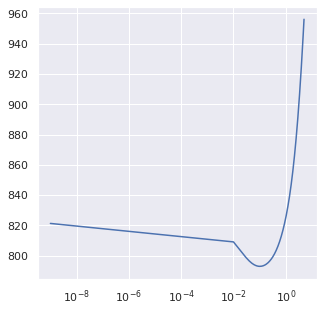

In [20]:
print(RSS_reg_coeff)
sns.set(rc = {'figure.figsize':(5,5)})
plt.semilogx(Lambda, RSS_reg_coeff)
best_lambda_l2 = Lambda[RSS_reg_coeff.index(min(RSS_reg_coeff))]
print(best_lambda_l2)

In [21]:
#A logistic regression  model  to  classify  between  low  and  high  combat  points.
import numpy as np
from sklearn.model_selection import train_test_split

X = data_np[:, :-1]
y = data_np[:,-1]

avg = y - np.average(y)
for i in range(len(avg)):
  if avg[i]<0:
    y[i] = 0
  else:
    y[i] = 1

XL_train, XL_test, yL_train, yL_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#train the model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none').fit(XL_train, yL_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
#score and test the classifier
clf.predict(XL_test)
#print("The probability of the outcomes are: ")
#print(clf.predict_proba(XL_test))
print("The score of the classifier on the test set is: ")
print(clf.score(XL_test, yL_test))

The score of the classifier on the test set is: 
0.9


**vi. Linear Regression with l2 regularization and Cross Validation**

In [24]:
#feature combinations
categorical_vals = ['primary_strength_Bug', 'primary_strength_Dragon','primary_strength_Electric', 'primary_strength_Fairy', 'primary_strength_Fighting', 'primary_strength_Fire', 'primary_strength_Ghost', 'primary_strength_Grass','primary_strength_Ground', 'primary_strength_Ice','primary_strength_Normal', 'primary_strength_Poison', 'primary_strength_Psychic', 'primary_strength_Rock','primary_strength_Water']
list1 = ["attack_value", "defense_value"]
list2 = ["stamina", "attack_value", "defense_value"]
list3 = ["flee_rate", "capture_rate", "spawn_chance"]

f_comb1 = one_hot_encoded_data2[list1 + categorical_vals].to_numpy()
f_comb2 = one_hot_encoded_data2[list2 + categorical_vals].to_numpy()
f_comb3 = one_hot_encoded_data2[list3  + categorical_vals].to_numpy()
outcomes = Y

X_train = {}
Y_train = {}

X_train[0], Y_train[0] = f_comb1[0:29, :], outcomes[0:29].reshape(29,1)
X_train[1], Y_train[1] = f_comb1[1*29: 1*29+29, :], outcomes[1*29: 1*29+29].reshape(29,1)
X_train[2], Y_train[2] = f_comb1[2*29: 2*29+29, :], outcomes[2*29: 2*29+29].reshape(29,1)
X_train[3], Y_train[3] = f_comb1[3*29: 3*29+29, :], outcomes[3*29:3*29+29].reshape(29,1)
X_train[4], Y_train[4] = f_comb1[4*29: , :], outcomes[4*29:].reshape(30,1)

#cross_validation for feature combination 1
def RSS(Y_Pred, Y_Actual):
      rss_error = np.sum(np.square(Y_Pred- Y_Actual))
      return np.sqrt(rss_error)

fold_RSS = []
for i in range(5):
  XTrain = np.ones([1, 17])
  YTrain = np.ones([1, 1])
  for j in range(5):
    if i!= j: 
      XTrain = np.vstack((XTrain, X_train[j]))
      YTrain = np.vstack((YTrain, Y_train[j]))
  X_test = X_train[i]
  Y_test = Y_train[i]

  LP = Linear_regression(XTrain[1: ], YTrain[1: ])
  LP.fit()
  Y_Pred = LP.predict(X_test)
  fold_RSS.append(RSS(Y_Pred, Y_test))
  
print("The score for attack values, defense values and categrical values are", np.average(fold_RSS))

X_train[0] = f_comb2[0:29, :]
X_train[1] = f_comb2[1*29: 1*29+29, :]
X_train[2] = f_comb2[2*29: 2*29+29, :]
X_train[3] = f_comb2[3*29: 3*29+29, :]
X_train[4] = f_comb2[4*29: , :]

#cross_validation for feature combination 2 
def RSS(Y_Pred, Y_Actual):
      rss_error = np.sum(np.square(Y_Pred- Y_Actual))
      return np.sqrt(rss_error)

fold_RSS = []
for i in range(5):
  XTrain = np.ones([1, 18])
  YTrain = np.ones([1, 1])
  for j in range(5):
    if i!= j: 
      XTrain = np.vstack((XTrain, X_train[j]))
      YTrain = np.vstack((YTrain, Y_train[j]))
  X_test = X_train[i]
  Y_test = Y_train[i]

  LP = Linear_regression(XTrain[1: ], YTrain[1: ])
  LP.fit()
  Y_Pred = LP.predict(X_test)
  fold_RSS.append(RSS(Y_Pred, Y_test))


print("The score for stamina, attack values, defense values and categrical values are", np.average(fold_RSS))
###
X_train[0] = f_comb3[0:29, :]
X_train[1] = f_comb3[1*29: 1*29+29, :]
X_train[2] = f_comb3[2*29: 2*29+29, :]
X_train[3] = f_comb3[3*29: 3*29+29, :]
X_train[4] = f_comb3[4*29: , :]

#cross_validation
def RSS(Y_Pred, Y_Actual):
      rss_error = np.sum(np.square(Y_Pred- Y_Actual))
      return np.sqrt(rss_error)

fold_RSS = []
for i in range(5):
  XTrain = np.ones([1, 18])
  YTrain = np.ones([1, 1])
  for j in range(5):
    if i!= j: 
      XTrain = np.vstack((XTrain, X_train[j]))
      YTrain = np.vstack((YTrain, Y_train[j]))
  X_test = X_train[i]
  Y_test = Y_train[i]

  LP = Linear_regression(XTrain[1: ], YTrain[1: ])
  LP.fit()
  Y_Pred = LP.predict(X_test)
  fold_RSS.append(RSS(Y_Pred, Y_test))

print("The score for flee rate, capture rate, spawn race and categrical values are", np.average(fold_RSS))

The score for attack values, defense values and categrical values are 1392.694471794122
The score for stamina, attack values, defense values and categrical values are 877.5946366040696
The score for flee rate, capture rate, spawn race and categrical values are 3932.099980522421


In [25]:
##Weights for linear Regression with l1 regularization

from sklearn import linear_model
#Select the best co-efficient for l1 regularization
scores = []
Lambda2 = [2, 1.75, 1.5, 1.125, 1.00, 0.75, 0.5, 0.25, 0.1, 0.2, 0.05, 0.01, 0.005, 0.001, 0.0001]
for x in Lambda2:
  clf = linear_model.Lasso(x)
  clf.fit(XL_train, yL_train)
  scores.append(clf.score(XL_test, yL_test))
best_coeff = Lambda[scores.index(min(scores))]
print("Best co-efficient with l1 normalization", min(scores), Lambda[scores.index(min(scores))])

#Get parameters for l1 regularization
clf = linear_model.Lasso(best_coeff)
clf.fit(XL_train, yL_train)
scores.append(clf.score(XL_test, yL_test))
print("The intercept with l1 regularization: ", clf.intercept_)
print("The wights for the features with l1 regu;larization: \n", clf.coef_)

Best co-efficient with l1 normalization 0.5104912683686157 0.14028056209418838
The intercept with l1 regularization:  -1.3517623451362775
The wights for the features with l1 regu;larization: 
 [ 0.00224001  0.00524085  0.00532042 -0.         -0.          0.00020723
  0.         -0.          0.         -0.          0.         -0.
 -0.          0.          0.          0.          0.         -0.
 -0.         -0.          0.        ]


In [26]:
#Get parameters for l2 regularization
clf = Linear_regression_with_l2_reg(XL_train, yL_train, best_lambda_l2, return_weight= True)
intercept_, coef_ = clf.fit()
print("The intercept with l1 regularization: ", intercept_)
print("The wights for the features with l1 regu;larization: \n", coef_)

The intercept with l1 regularization:  -1.086158232861262
The wights for the features with l1 regu;larization: 
 [ 1.77717510e-03  4.97469562e-03  5.37733688e-03 -4.58344163e-01
 -7.20556893e-02  2.25175768e-04  8.69562510e-02 -1.59232802e-01
  1.04672379e-01 -2.81774801e-01  7.14180990e-02 -2.30098709e-01
 -2.32662826e-01 -3.47595206e-02 -5.86824876e-02  3.52227776e-01
 -6.47291778e-04 -1.05826979e-01 -3.35174849e-01 -2.03261377e-01
 -5.93110963e-02]


**viii. Logistic regression  model  to  classify  between  low  and  high  combat  points.**

In [27]:
#A logistic  regression  model  with  regularization  to  classify  between  low and  high  combat  points

**ix. A  logistic  regression  model  with  regularization  to  classify  between  low and  high  combat  points**

In [ ]:
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV
model = LogisticRegression()
penalty = ['l1', 'l2']
C = np.linspace(0.0, 10, 50)
hyperparameters = dict(C=C, penalty = penalty)
kfold = KFold(n_splits= 5)


rsearch = GridSearchCV(model, hyperparameters, cv = kfold)
rsearch.fit(XL_train, yL_train)
print(rsearch.best_params_)


In [29]:
print(rsearch.best_params_)

{'C': 2.4489795918367347, 'penalty': 'l2'}
